In [1]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import SVG

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'] = df['quality'].apply(lambda x : 0 if x <=5 else 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [5]:
df.quality.unique()

array([0, 1])

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

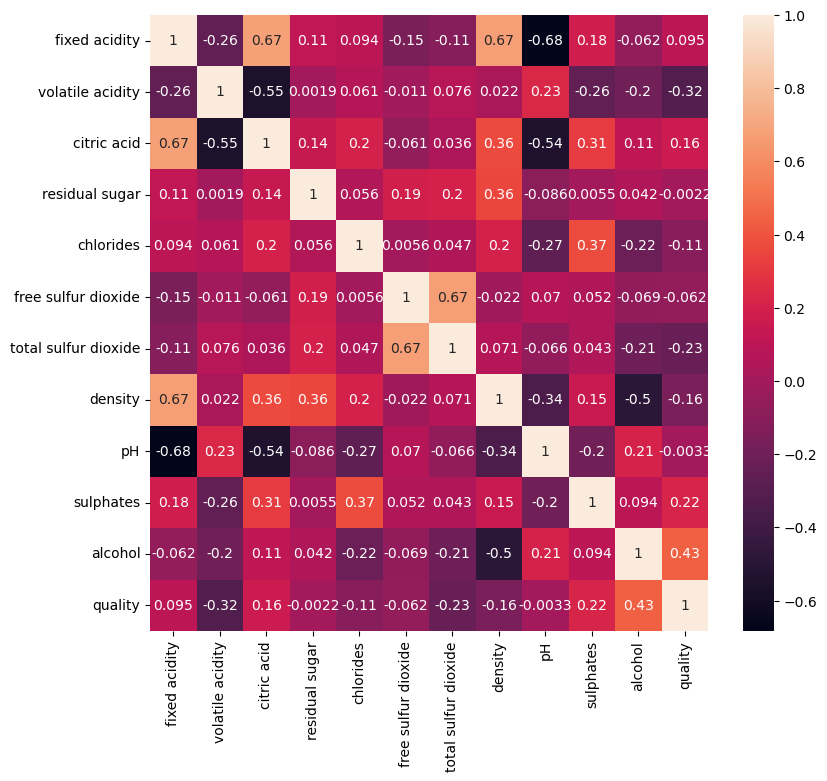

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix, annot=True)

In [8]:
corr_matrix = df.corr()
corr_with_target = abs(corr_matrix['quality']).sort_values(ascending=False)
best_features = corr_with_target[1:6].index.tolist()
print("Best features based on correlation analysis: ", best_features)

Best features based on correlation analysis:  ['alcohol', 'volatile acidity', 'total sulfur dioxide', 'sulphates', 'citric acid']


In [9]:
# create a list of feature columns
feature_cols = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide']

# define X and y
X = df[feature_cols]
y = df.quality

alcohol: 0.8534468516082325
volatile acidity: 0.0
sulphates: 0.14655314839176745
citric acid: 0.0
total sulfur dioxide: 0.0


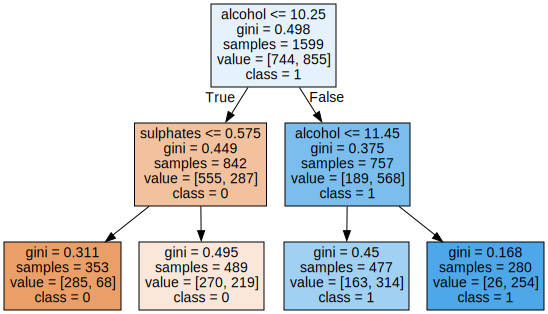

In [10]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
# train decision tree with max_depth=2
tree2 = DecisionTreeClassifier(max_depth=2,random_state=1)
tree2.fit(X, y)
# print feature importances
for name, importance in zip(feature_cols, tree2.feature_importances_):
    print(f"{name}: {importance}")
    
graph = Source(export_graphviz(tree2, out_file=None,
                               feature_names=feature_cols,
                               class_names=['0','1'],#'3', '4', '5', '6', '7', '8'],
                               filled=True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train decision tree with max_depth=2
tree2 = DecisionTreeClassifier(max_depth=2,random_state=1)
tree2.fit(X_train, y_train)
# accuracy on the testing set
accuracy = tree2.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.70625


One way to regularize the decision tree classifier is by setting the min_samples_leaf hyperparameter to a value greater than 1. This specifies the minimum number of samples required to be at a leaf node of the tree. By increasing this value, we can prevent the tree from growing too deep and overfitting the training data.

alcohol: 0.5184973113146755
volatile acidity: 0.09609707716101944
sulphates: 0.22034963780774677
citric acid: 0.020572619943185617
total sulfur dioxide: 0.14448335377337274


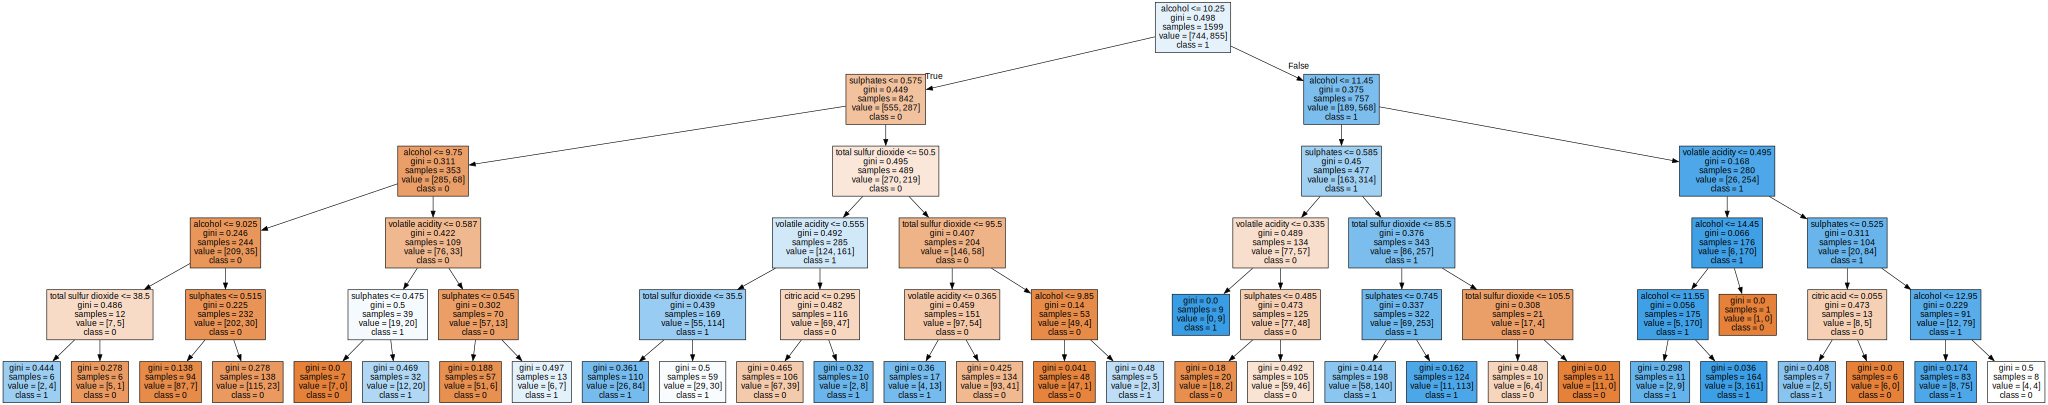

In [12]:
# create a decision tree classifier with max_depth=5
tree5 = DecisionTreeClassifier(max_depth=5)
tree5.fit(X, y)

for name, importance in zip(feature_cols, tree5.feature_importances_):
    print(f"{name}: {importance}")
    
# generate the Graphviz representation of the decision tree
graph5 = Source(export_graphviz(tree5, out_file=None,
                               feature_names=feature_cols,
                               class_names=['0', '1'],
                               filled=True)) 
svg5 = SVG(graph5.pipe(format='svg'))
display(svg5)
# graph5.render('wine_quality_tree5', format='png', view=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train decision tree with max_depth=5
tree5 = DecisionTreeClassifier(max_depth=5)
tree5.fit(X_train, y_train)
# y_pred = tree5.predict(X_test)
# accuracy on the testing set
accuracy = tree5.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.746875


As we can see, the decision tree with max_depth=2 has only 3 levels of splits, while the decision tree with max_depth=5 has 6 levels of splits. The depth of the tree controls the bias-variance trade-off. A tree with a small depth will have high bias and low variance, while a tree with a large depth will have low bias and high variance. In other words, a shallow tree is more likely to underfit the data, while a deep tree is more likely to overfit the data.

The algorithm chooses the attribute to split on based on the information gain. At a given tree level, different nodes may split on different attributes, depending on which attribute provides the most information gain. For example, in the decision tree with max_depth=5, at level 3, the node on the left splits on "total sulfur dioxide", while the node on the right splits on "volatile acidity". This is because "total sulfur dioxide" provides the most information gain for the left node, while "volatile acidity" provides the most information gain for the right node

The depth of a decision tree can have a significant impact on the bias and variance of the model. As the depth of the tree increases, the model becomes more complex and can fit the training data more closely, reducing bias. However, this can also increase the variance of the model, making it more likely to overfit the data and perform poorly on new, unseen data.

In the given code, two decision trees are created with different depths: one with a max_depth of 2 and another with a max_depth of 5. The decision tree with a max_depth of 2 is less complex and has higher bias but lower variance than the one with a max_depth of 5, which is more complex and has lower bias but higher variance.

Regarding the choices the algorithm makes in which attributes to split on, it depends on the specific algorithm and the data. In general, decision tree algorithms aim to split on the attributes that provide the most information gain or reduce the most impurity in the target variable. At each tree level, different nodes may split on different attributes, depending on which attribute provides the most information gain or impurity reduction at that particular level.

Tuning hyperparameters

In [14]:
# precision_recall_f-score_support()

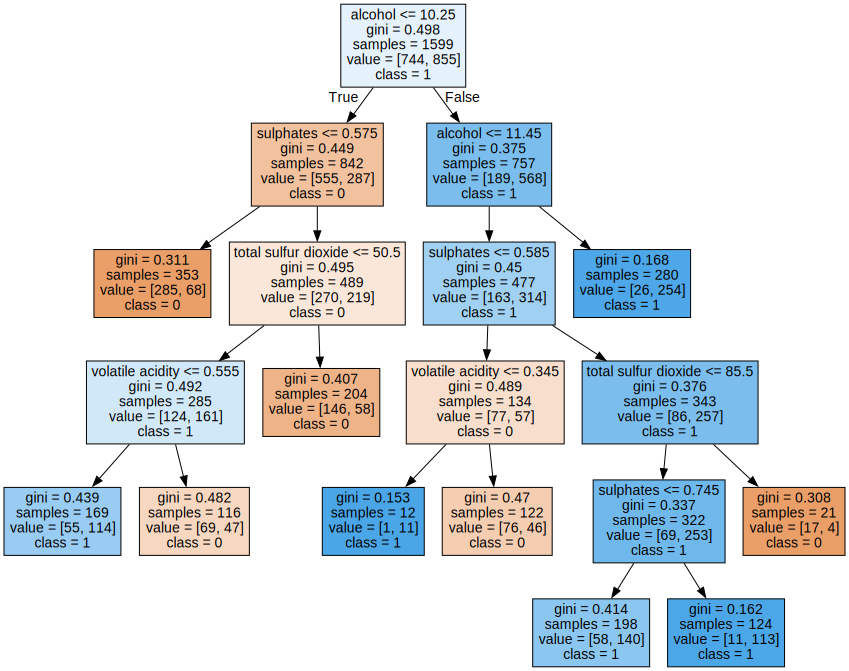

In [15]:
# create a decision tree classifier with max_depth=5
dTree_Max_Depth_3 = DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=10,min_samples_leaf=10,random_state=4)
dTree_Max_Depth_3.fit(X, y)

# generate the Graphviz representation of the decision tree
graph_Max_Depth_3 = Source(export_graphviz(dTree_Max_Depth_3, out_file=None,
                               feature_names=feature_cols,
                               class_names=['0', '1'],
                               filled=True)) 
graph_Max_Depth_3 = SVG(graph_Max_Depth_3.pipe(format='svg'))
display(graph_Max_Depth_3)

In [16]:
dTree_Max_Depth_3 = DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=10,min_samples_leaf=10,random_state=4)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
dTree_Max_Depth_3.fit(X_train, y_train)
y_pred = dTree_Max_Depth_3.predict(X_test)
accuracy = tree5.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.790625


#### Neural Networks

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [18]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [19]:
X = df.drop(['quality'],axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    

In [21]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [22]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
mlp1 = MLPClassifier(hidden_layer_sizes=(2, 2),max_iter=500)
mlp1.fit(X_train,y_train)
predictions = mlp1.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[133  58]
 [ 45 164]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       191
           1       0.74      0.78      0.76       209

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [24]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp1.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp1.coefs_)):
    m = len(mlp1.coefs_[l])
    n = len(mlp1.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp1.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp1.intercepts_[l]) for l,_ in enumerate(mlp1.intercepts_)]))


This dataset has 11 input nodes and 2 output node(s)
There are 3 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 11x2 (11 nodes feeding into a layer of 2 nodes)
  1: 2x2 (2 nodes feeding into a layer of 2 nodes)
  2: 2x1 (2 nodes feeding into a layer of 1 nodes)

There are 3 1D arrays of intercepts, one for each layer
Each layer has [2, 2, 1] intercepts, one for each node


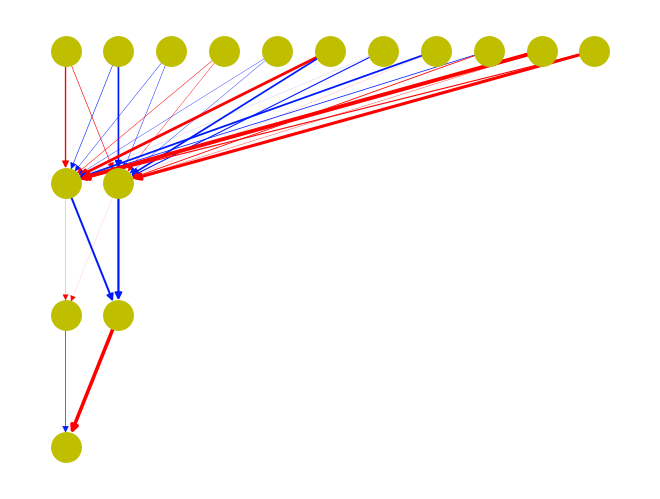

In [25]:
show_ann(mlp1)

In [26]:

mlp2 = MLPClassifier(hidden_layer_sizes=(15, 15, 15),max_iter=10000)
mlp2.fit(X_train,y_train)
predictions = mlp2.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[131  60]
 [ 50 159]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       191
           1       0.73      0.76      0.74       209

    accuracy                           0.73       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



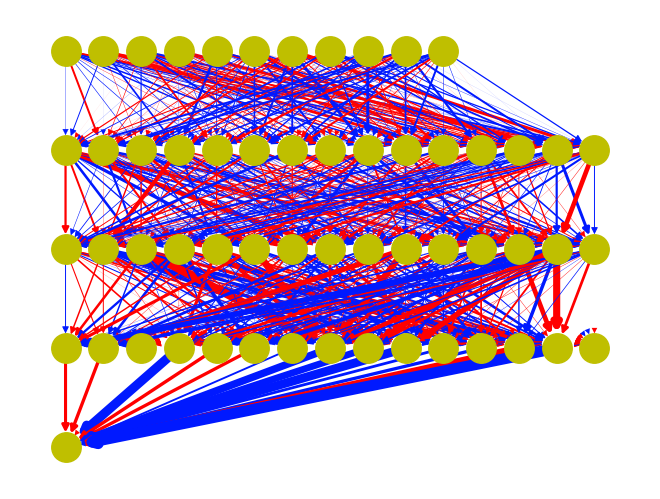

In [27]:
show_ann(mlp2)

In [28]:
mlp3 = MLPClassifier(hidden_layer_sizes=(30, 30, 15),max_iter=10000)
mlp3.fit(X_train,y_train)
predictions = mlp3.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[149  42]
 [ 52 157]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       191
           1       0.79      0.75      0.77       209

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.76       400
weighted avg       0.77      0.77      0.77       400



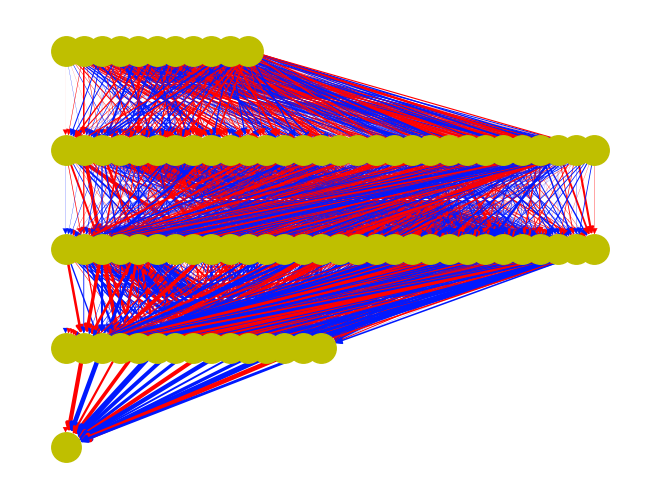

In [29]:
show_ann(mlp3)